# Deep Learning Model
We are aiming to predict the Lip_norm parameter based on the binary positions and full embedding of a peptide.

## Dataset preparation

### Read and prepare embeddings
Read generated embeddings from the pkl file, that was generated in notebook 2.

In [1]:
import json
import pickle
import pandas as pd

def load_and_process_embedding(file_path):
    with open(file_path, 'rb') as file:
        embeddings = pickle.load(file)
    embeddings = pd.DataFrame(embeddings)
    embeddings.set_index('Uniprot_ID', inplace=True)
    embeddings = embeddings.drop(columns=['full_sequence'])
    return embeddings

embeddings = pd.DataFrame()

embedding_files = [
    'data/embeddings_new_3_1.pkl',
    # 'data/embeddings_new_3_2.pkl',
    # 'data/embeddings_new_3_3.pkl',
]

for file_path in embedding_files:
    print(file_path)
    current_embeddings = load_and_process_embedding(file_path)
    embeddings = pd.concat([embeddings, current_embeddings])

data/embeddings_new_3_1.pkl


In [2]:
# embeddings = embeddings[:80]

In [3]:
embeddings_ = embeddings.reset_index()

In [4]:
print(len(embeddings_['Uniprot_ID'].unique()))
print(len(embeddings_['Uniprot_ID']))


500
500


In [5]:
embeddings

,padded_sequence,full_sequence_length,num_pad_tokens,padded_sequence_length,expected_padded_length,full_embedding
Uniprot_ID,,,,,,
P15703,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,313,687,1000,1000,"[[0.10360906273126602, -0.04516144096851349, 0..."
P06169,MSEITLGKYLFERLKQVNVNTVFGLPGDFNLSLLDKIYEVEGMRWA...,563,437,1000,1000,"[[0.06506824493408203, -0.017786137759685516, ..."
P38174,MTDAEIENSPASDLKELNLENEGVEQQDQAKADESDPVESKKKKNK...,421,579,1000,1000,"[[0.017335770651698112, -0.009276551194489002,..."
P00359,MVRVAINGFGRIGRLVMRIALSRPNVEVVALNDPFITNDYAAYMFK...,332,668,1000,1000,"[[0.051230236887931824, -0.001900210976600647,..."
P37292,MFPRASALAKCMATVHRRGLLTSGAQSLVSKPVSEGDPEMFDILQQ...,490,510,1000,1000,"[[0.08428246527910233, -0.011112003587186337, ..."
...,...,...,...,...,...,...
P07251,MLARTAAIRSLSRTLINSTKAARPAAAALASTRRLASTKAQPTEVS...,545,455,1000,1000,"[[0.07777126878499985, -0.0584837943315506, 0...."
P36010,MSSQTERTFIAVKPDGVQRGLVSQILSRFEKKGYKLVAIKLVKADD...,153,847,1000,1000,"[[0.09896280616521835, -0.03097490407526493, 0..."
Q03786,MTEKHKTMGKFKVIVLAGTAGTGKSTIAGELIHEFKDIYPDLKFIE...,193,807,1000,1000,"[[0.07160041481256485, -0.018588371574878693, ..."


In [6]:
# embeddings = embeddings.reset_index()
# embeddings = embeddings.drop_duplicates(subset='Uniprot_ID', keep='first')
# embeddings.set_index('Uniprot_ID', inplace=True)

In [7]:
embeddings

,padded_sequence,full_sequence_length,num_pad_tokens,padded_sequence_length,expected_padded_length,full_embedding
Uniprot_ID,,,,,,
P15703,MRFSTTLATAATALFFTASQVSAIGELAFNLGVKNNDGTCKSTSDY...,313,687,1000,1000,"[[0.10360906273126602, -0.04516144096851349, 0..."
P06169,MSEITLGKYLFERLKQVNVNTVFGLPGDFNLSLLDKIYEVEGMRWA...,563,437,1000,1000,"[[0.06506824493408203, -0.017786137759685516, ..."
P38174,MTDAEIENSPASDLKELNLENEGVEQQDQAKADESDPVESKKKKNK...,421,579,1000,1000,"[[0.017335770651698112, -0.009276551194489002,..."
P00359,MVRVAINGFGRIGRLVMRIALSRPNVEVVALNDPFITNDYAAYMFK...,332,668,1000,1000,"[[0.051230236887931824, -0.001900210976600647,..."
P37292,MFPRASALAKCMATVHRRGLLTSGAQSLVSKPVSEGDPEMFDILQQ...,490,510,1000,1000,"[[0.08428246527910233, -0.011112003587186337, ..."
...,...,...,...,...,...,...
P07251,MLARTAAIRSLSRTLINSTKAARPAAAALASTRRLASTKAQPTEVS...,545,455,1000,1000,"[[0.07777126878499985, -0.0584837943315506, 0...."
P36010,MSSQTERTFIAVKPDGVQRGLVSQILSRFEKKGYKLVAIKLVKADD...,153,847,1000,1000,"[[0.09896280616521835, -0.03097490407526493, 0..."
Q03786,MTEKHKTMGKFKVIVLAGTAGTGKSTIAGELIHEFKDIYPDLKFIE...,193,807,1000,1000,"[[0.07160041481256485, -0.018588371574878693, ..."


In [8]:
import numpy as np

# Creating trimmed embeddings: because of the first and last tokens
# (https://www.science.org/doi/suppl/10.1126/science.ade2574/suppl_file/science.ade2574_sm.pdf)
# We used BOS and EOS tokens to signal the beginning and end of a real protein, to allow the model to separate a full-sized protein from a cropped one.
trimmed_embeddings = [np.array(embedding)[1:-1, :] for embedding in embeddings['full_embedding']]
trimmed_embeddings_df = pd.DataFrame({'embeddings': trimmed_embeddings}, index=embeddings.index)

In [9]:
# We can see that we have the trimmed embedings ready to be used
trimmed_embeddings_df.head()

,embeddings
Uniprot_ID,
P15703,"[[-0.0004594324855133891, -0.04933467134833336..."
P06169,"[[0.049063701182603836, 0.05866869166493416, -..."
P38174,"[[0.09132011979818344, 0.050998788326978683, -..."
P00359,"[[0.04381273314356804, -0.028464781120419502, ..."
P37292,"[[0.1320541352033615, 0.09156358242034912, -0...."


### Read Binary position data
Read generated binary position data and target values from the csv file, that was generated in notebook 1. The data is already ready, which means that the binary position  is already padded to the length of one thousand.

In [10]:
# Get the dataset
df = pd.read_csv('data/OsmoticStress_with_binary_positions_padded.csv')
df['Binary_Positions'] = df['Binary_Positions'].apply(json.loads)
df['Padded_Binary_Positions'] = df['Padded_Binary_Positions'].apply(json.loads)
df.drop(columns=['full_sequence', 'Peptide_sequence', "Binary_Positions"], inplace=True)
df.set_index('Uniprot_ID', inplace=True)

df.head()

,Log2FC(LiP_norm),Padded_Binary_Positions
Uniprot_ID,,
P15703,-2.176707,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,0.285029,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,-0.498240,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,0.348193,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,-0.434615,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [11]:
df.shape

(28008, 2)

In [12]:
df_ = df.reset_index()
counts = df_['Uniprot_ID'].value_counts()
print(counts)

P32324    536
P02994    452
P10081    204
P06169    179
P10592    178
         ... 
P53139      1
P31334      1
P10127      1
P53060      1
Q03687      1
Name: Uniprot_ID, Length: 2490, dtype: int64


### Prepare training dataset
Merge both embeddings and padded binary position together.

In [13]:
# dataset = df.merge(trimmed_embeddings_df, left_index=True, right_index=True)
dataset = df.merge(trimmed_embeddings_df, left_index=True, right_index=True, how='inner')
# We can see that we have only the columns: 'Lip_norm', 'Binary Position', 'Embeddings'
print(dataset.head())
print(dataset.shape)

            Log2FC(LiP_norm)  \
Uniprot_ID                     
O13297             -0.374875   
O13297             -0.207803   
O13297             -0.130126   
O13297              0.121675   
O13297              0.075119   

                                      Padded_Binary_Positions  \
Uniprot_ID                                                      
O13297      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
O13297      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
O13297      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
O13297      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
O13297      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                   embeddings  
Uniprot_ID                                                     
O13297      [[0.05378029868006706, 0.09327487647533417, -0...  
O13297      [[0.05378029868006706, 0.09327487647533417, -0...  
O13297      [[0.05378029868006706, 0.09327487647533417, -0...  

In [14]:
dataset_ = dataset.reset_index()
counts = dataset_['Uniprot_ID'].value_counts()
print(counts)

P32324    536
P02994    452
P10081    204
P06169    179
P10592    178
         ... 
Q3E830      1
Q03441      1
P25628      1
Q99220      1
P38251      1
Name: Uniprot_ID, Length: 500, dtype: int64


In [15]:
# Reduce data quantity for memory's sake
# dataset = dataset[:8000]
dataset = dataset.sample(n=6000, random_state=42)

In [16]:
dataset = dataset.reset_index()

In [17]:
print(dataset.shape)
print(len(dataset['Uniprot_ID'].unique()))

(6000, 4)
481


In [18]:
# dataset = dataset[:1000]

In [19]:
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

peptide_ids = dataset['Uniprot_ID'].unique()
np.random.seed(42)
np.random.shuffle(peptide_ids)


In [20]:
# # Assign 80% of peptide IDs to training + validation, 20% to testing
# num_train_val_ids = int(0.95 * len(peptide_ids))
# train_val_ids = peptide_ids[:num_train_val_ids]
# test_ids = peptide_ids[num_train_val_ids:]

# # Mask for test dataset
# test_mask = dataset['Uniprot_ID'].isin(test_ids)
# test_data = dataset.loc[test_mask]

# # Remaining data for training and validation
# train_val_data = dataset.loc[~test_mask]

# # Randomly assign 80% of the train_val_data rows to training, 20% to validation
# train_data = train_val_data.sample(frac=0.8, random_state=42)  # Random_state for reproducibility
# val_data = train_val_data.drop(train_data.index)

# # Output the shapes of the datasets
# print(train_data.shape)
# print(val_data.shape)
# print(test_data.shape)

In [21]:
# test_data['Uniprot_ID'].unique()

In [22]:
# num_train_ids = int(0.5 * len(peptide_ids))
# num_val_ids = int(0.15 * len(peptide_ids))

# train_ids = peptide_ids[:num_train_ids]
# val_ids = peptide_ids[num_train_ids:num_train_ids + num_val_ids]
# test_ids = peptide_ids[num_train_ids + num_val_ids:]

# train_mask = dataset['Uniprot_ID'].isin(train_ids)
# val_mask = dataset['Uniprot_ID'].isin(val_ids)
# test_mask = dataset['Uniprot_ID'].isin(test_ids)

# train_data = dataset.loc[train_mask]
# val_data = dataset.loc[val_mask]
# test_data = dataset.loc[test_mask]

# print(train_data.shape)
# print(val_data.shape)
# print(test_data.shape)


In [23]:
# train_data.head()

# def dataframe_to_tensor(data):
#     embeddings_tensor = torch.tensor(np.array(data['embeddings'].tolist(), dtype=np.float16), device=device)
#     positions_tensor = torch.tensor(np.array(data['Padded_Binary_Positions'].tolist(), dtype=np.float16), device=device)
#     y_tensor = torch.tensor(np.array(data['Log2FC(LiP_norm)'].tolist(), dtype=np.float16))
#     return embeddings_tensor, positions_tensor, y_tensor

# train_embeddings, train_positions, train_y = dataframe_to_tensor(train_data)
# val_embeddings, val_positions, val_y = dataframe_to_tensor(val_data)
# test_embeddings, test_positions, test_y = dataframe_to_tensor(test_data)

# print(train_embeddings.shape)
# print(val_embeddings.shape)
# print(test_embeddings.shape)

In [24]:
############################################# If shuffle true ##############################################
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Create tensors directly on the GPU
embeddings_tensor = torch.tensor(np.array(dataset['embeddings'].tolist(), dtype=np.float16), device=device)
binary_positions_tensor = torch.tensor(np.array(dataset['Padded_Binary_Positions'].tolist(), dtype=np.float16), device=device)
###############################################################################################################

In [25]:
print("embeddings_tensor shape", embeddings_tensor.shape)
print("binary_positions_tensor shape", binary_positions_tensor.shape)

embeddings_tensor shape torch.Size([6000, 1000, 1280])
binary_positions_tensor shape torch.Size([6000, 1000])


In [26]:
y = torch.tensor(np.array(dataset['Log2FC(LiP_norm)'].tolist(), dtype=np.float16), device=device)

print("y shape:", y.shape)

y shape: torch.Size([6000])


## Model Training
Now that we have both input and target data, we can create our model.

In [27]:
import torch

print(torch.__version__)
print(device)

1.13.1+cu116
cuda


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import copy
from torch.utils.data import TensorDataset, DataLoader, random_split, Dataset
from torch.cuda.amp import GradScaler, autocast

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data setup
class PeptideDataset(Dataset):
    def __init__(self, embeddings, position, y):
        self.embeddings = torch.tensor(embeddings, dtype = torch.float16)
        self.position = torch.tensor(position, dtype = torch.int64)
        self.y = torch.tensor(y, dtype = torch.float16)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        x = {"embeddings":self.embeddings[index],
             "position":self.position[index]}
        y = self.y[index]
        return x, y

############################################# If shuffle true ##############################################
dataset = PeptideDataset(embeddings_tensor, binary_positions_tensor, y)

train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size,test_size])
############################################################################################################

# train_dataset = PeptideDataset(train_embeddings, train_positions, train_y)
# val_dataset = PeptideDataset(val_embeddings, val_positions, val_y)
# test_dataset = PeptideDataset(test_embeddings, test_positions, test_y)


/data/nasif12/home_if12/l_schewinski/.conda/envs/l-schewinski-tp-2/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/data/nasif12/home_if12/l_schewinski/.conda/envs/l-schewinski-tp-2/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/data/nasif12/home_if12/l_schewinski/.conda/envs/l-schewinski-tp-2/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  from ipykernel import kern

In [29]:
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model definition
class PeptideRegressor(nn.Module):
    def __init__(self, input_dim, num_heads, dropout_rate):
        super(PeptideRegressor, self).__init__()

        self.dropout = nn.Dropout(0.7)
        self.fc_embed = torch.nn.Linear(1280, 128)

        self.pos_embed = nn.Embedding(2, 1280)
        
        self.seq_pos_embed = nn.Embedding(1000, 1280)
        self.pept_pos_embed = nn.Embedding(2, 1280)
        
        self.norm = nn.LayerNorm(input_dim)
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=128, 
            nhead=num_heads, 
            dropout=dropout_rate
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=1)
        
        self.pooling = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(128, 1)

    def forward(self, x):
        positions = x["position"]
        x = x["embeddings"] + self.seq_pos_embed(torch.arange(x["position"].size(1), device=device)) + self.pept_pos_embed(x["position"])
        x = x.permute(1, 0, 2)
        
        embed = self.fc_embed(x)
        embed = self.dropout(embed)
        
        transformer_output = self.transformer_encoder(embed)
        transformer_output = transformer_output.permute(1, 2, 0)
        
        mask = positions == 1
        mask = mask.unsqueeze(1)
        peptide_embeddings = transformer_output * mask.float()
        pooled = torch.sum(peptide_embeddings, dim=-1)/torch.sum(positions==1,dim=-1).unsqueeze(1)
        
        
        output = self.fc(pooled)
        return output

Epoch 1, Train Loss: 0.1296578347682953
Epoch 2, Train Loss: 7.644472122192383
Epoch 3, Train Loss: 1.3650667667388916
Epoch 4, Train Loss: 0.7471688389778137
Epoch 5, Train Loss: 2.3570683002471924
Epoch 6, Train Loss: 1.885072946548462
Epoch 7, Train Loss: 0.8774135112762451
Epoch 8, Train Loss: 0.14969809353351593
Epoch 9, Train Loss: 0.06721731275320053
Epoch 10, Train Loss: 0.2839351296424866
Epoch 11, Train Loss: 0.4678979814052582
Epoch 12, Train Loss: 0.5546098947525024
Epoch 13, Train Loss: 0.49511075019836426
Epoch 14, Train Loss: 0.3959959149360657
Epoch 15, Train Loss: 0.22455337643623352
Epoch 16, Train Loss: 0.1061701774597168
Epoch 17, Train Loss: 0.05068361014127731
Epoch 18, Train Loss: 0.06275628507137299
Epoch 19, Train Loss: 0.10602337121963501
Epoch 20, Train Loss: 0.1531354784965515
Epoch 21, Train Loss: 0.1953672468662262
Epoch 22, Train Loss: 0.20501959323883057
Epoch 23, Train Loss: 0.17006206512451172
Epoch 24, Train Loss: 0.13809165358543396
Epoch 25, Train L

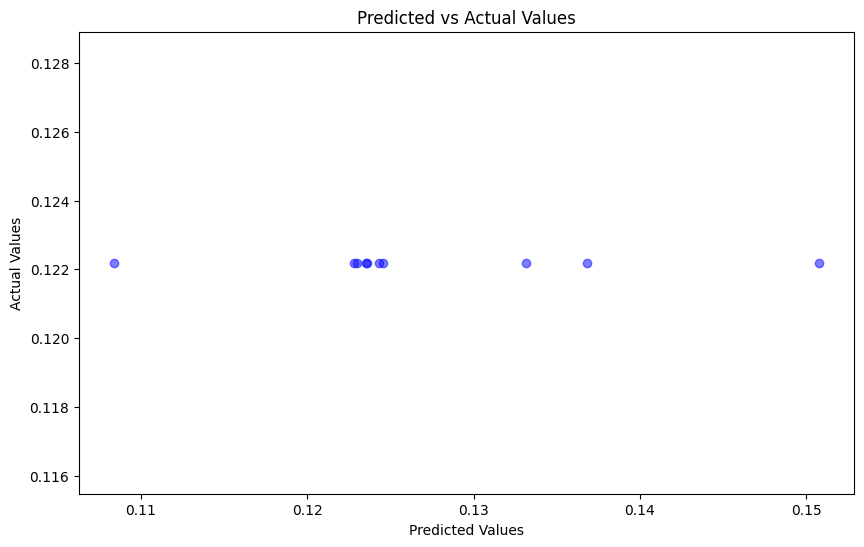

In [30]:
import matplotlib.pyplot as plt

model = PeptideRegressor(input_dim=1280, num_heads=8, dropout_rate=0)
model = model.to(device)

loss_fn = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0005) #, weight_decay=1e-3)
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-5)

scaler = GradScaler()

# Training settings
n_epochs = 200
best_val_loss = float('inf')
train_losses_avg = []
val_losses_avg = []

single_batch_X, single_batch_y = next(iter(train_loader))
for k, v in single_batch_X.items():
    single_batch_X[k] = v.to(device, non_blocking=True)
single_batch_y = single_batch_y.to(device, non_blocking=True)

predictions = []
actuals = []

# Training loop using a single batch for overfitting check
for epoch in range(n_epochs):
    model.train()
    train_losses = []

    optimizer.zero_grad()

    with autocast():
        y_pred = model(single_batch_X)
        loss = loss_fn(y_pred, single_batch_y.unsqueeze(1))

    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    train_loss_avg = sum(train_losses) / len(train_losses)

    mean_pred = y_pred.detach().cpu().numpy().mean()
    mean_actual = single_batch_y.detach().cpu().numpy().mean()
    predictions.append(mean_pred)
    actuals.append(mean_actual)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss_avg}')

predictions_plot = predictions[-10:]
actuals_plot = actuals[-10:]

print(actuals_plot)
print(predictions_plot)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(predictions_plot, actuals_plot, alpha=0.5, color='blue')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Predicted vs Actual Values')

plt.show()

In [31]:
model = PeptideRegressor(input_dim=1280, num_heads=8, dropout_rate=0.3)
model = model.to(device)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

scaler = GradScaler()

# Training settings
n_epochs = 10
best_val_loss = float('inf')
train_losses_avg = []
val_losses_avg = []

# Training loop
for epoch in range(n_epochs):
    model.train()
    train_losses = []
    for X_batch, y_batch in train_loader:
        for k, v in X_batch.items():
            X_batch[k] = v.to(device, non_blocking=True)
        y_batch = y_batch.to(device, non_blocking=True)

        optimizer.zero_grad()

        with autocast():
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch.unsqueeze(1))

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

    train_losses_avg.append(sum(train_losses) / len(train_losses))
    print(f'Epoch {epoch+1}, Train Loss: {train_losses_avg[-1]}')

    model.eval()
    val_losses = []
    for X_batch, y_batch in val_loader:
        for k, v in X_batch.items():
            X_batch[k] = v.to(device, non_blocking=True)
        y_batch = y_batch.to(device, non_blocking=True)

        with torch.no_grad(), autocast():
            y_pred = model(X_batch)
            mse = loss_fn(y_pred, y_batch.unsqueeze(1))
            val_losses.append(mse.item())

    avg_val_loss = sum(val_losses) / len(val_losses)
    val_losses_avg.append(avg_val_loss)
    print(f'Epoch {epoch+1}, Val MSE: {avg_val_loss}')
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = copy.deepcopy(model.state_dict())

torch.save({
    'model_state_dict': best_model,
}, 'best_peptide_model.pth')

Epoch 1, Train Loss: 0.6578973283867041
Epoch 1, Val MSE: 0.7686212974786758
Epoch 2, Train Loss: 0.5089087752832306
Epoch 2, Val MSE: 0.7841779696941376
Epoch 3, Train Loss: 0.5084608635306358
Epoch 3, Val MSE: 0.6877364364266395
Epoch 4, Train Loss: 0.5102926680776808
Epoch 4, Val MSE: 0.6905663027366002
Epoch 5, Train Loss: 0.5099965380960041
Epoch 5, Val MSE: 0.7450427294770876
Epoch 6, Train Loss: 0.5032979519830809
Epoch 6, Val MSE: 0.6879631886879604
Epoch 7, Train Loss: 0.5001629989345868
Epoch 7, Val MSE: 0.7061008537809054
Epoch 8, Train Loss: 0.4959138605495294
Epoch 8, Val MSE: 0.6914492495854696
Epoch 9, Train Loss: 0.4884243577056461
Epoch 9, Val MSE: 0.7037411270538966
Epoch 10, Train Loss: 0.4876339774661594
Epoch 10, Val MSE: 0.9067791652679443


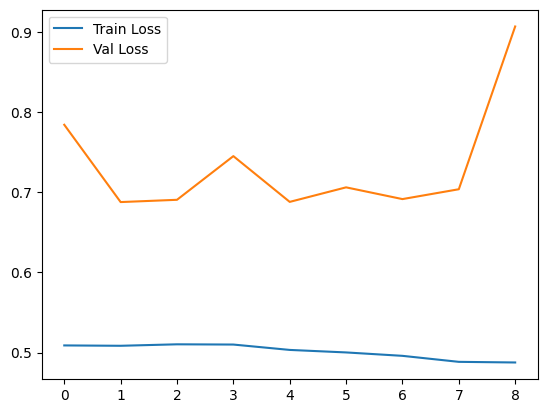

In [32]:
# # Visualize the training process
import matplotlib.pyplot as plt

plt.plot(train_losses_avg[1:], label='Train Loss')
plt.plot(val_losses_avg[1:], label='Val Loss')
plt.legend()
plt.show()


In [35]:
def model_summary(model):
    print("Model Summary:")
    print("{:<50} {:<30} {:<15} {:<15}".format("Layer Name", "Shape", "Parameters", "Trainable"))
    print("-" * 110)
    total_params = 0
    total_trainable_params = 0
    lm_params = 0
    lm_trainable_params = 0
    lm_layers = 0
    for name, parameter in model.named_parameters():
        param = parameter.numel()
        total_params += param
        # Check if the parameter is trainable
        trainable = parameter.requires_grad
        trainable_param = param if trainable else 0
        total_trainable_params += trainable_param
        print("{:<50} {:<30} {:<15} {:<15}".format(name, str(parameter.size()), param, trainable_param))
    print("-" * 110)
    print(f"Total Parameters: {total_params}")
    print(f"Trainable Parameters: {total_trainable_params}")

model_summary(model)

Model Summary:
Layer Name                                         Shape                          Parameters      Trainable      
--------------------------------------------------------------------------------------------------------------
fc_embed.weight                                    torch.Size([128, 1280])        163840          163840         
fc_embed.bias                                      torch.Size([128])              128             128            
pos_embed.weight                                   torch.Size([2, 1280])          2560            2560           
seq_pos_embed.weight                               torch.Size([1000, 1280])       1280000         1280000        
pept_pos_embed.weight                              torch.Size([2, 1280])          2560            2560           
norm.weight                                        torch.Size([1280])             1280            1280           
norm.bias                                          torch.Size([1280])       

In [36]:
model.load_state_dict(best_model)
model.eval()
test_losses = []
y_preds = []
y_actuals = []

for X_batch, y_batch in test_loader:
    for k, v in X_batch.items():
        X_batch[k] = v.to(device, non_blocking=True)
    y_batch = y_batch.to(device, non_blocking=True)
    
    with torch.no_grad(), autocast():
        y_pred = model(X_batch)
        mse = loss_fn(y_pred, y_batch.unsqueeze(1))
        
        y_preds.extend(y_pred.cpu().numpy())
        y_actuals.extend(y_batch.cpu().numpy())
        test_losses.append(mse.item())

avg_test_loss = sum(test_losses) / len(test_losses)
print(f'Test MSE: {avg_test_loss}')

Test MSE: 0.35850800786699566


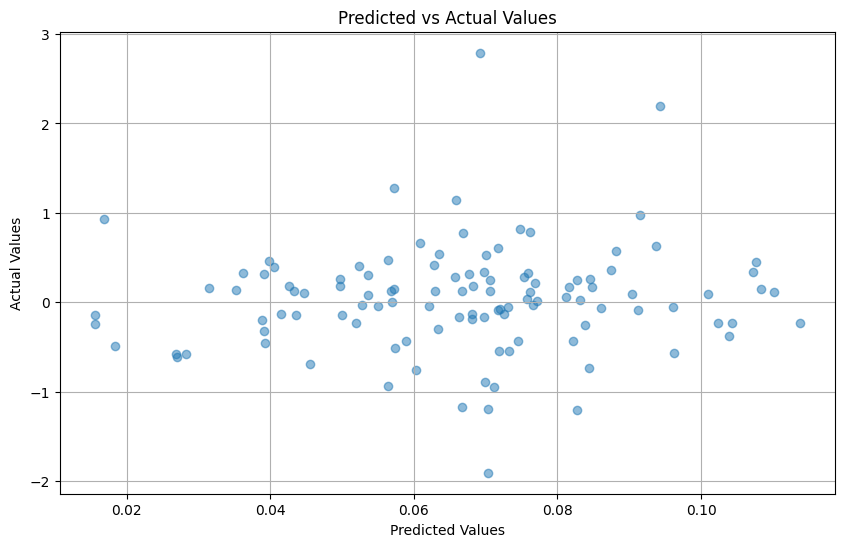

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_preds, y_actuals, alpha=0.5)
plt.title('Predicted vs Actual Values')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.grid(True)
plt.show()